## Student Name: Nikolaos Kollias

## Student ID: 23313145

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Task 1: Data Preparation Pipeline
* Open a new Jupyter notebook and name it etivity2.ipynb. In this notebook, create a data preparation pipeline that applies the same kind of transformations that you applied as part of e-tivity 1. It is OK to leave some of the transformations outside the pipeline but aim at including as many transformations as you can within the pipeline.
* Follow the notebook Tutorial 2 - Clustering and Manifold Learning.ipynb as an example.

In [78]:
# Load the data
data = pd.read_csv('bank.csv')
data.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [79]:
# Define categorical and numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [80]:
numerical_features


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [81]:
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [87]:
#Function for the new feature creation: age to balance ratio as in E-tivity 1
def create_new_features(X):
    # Ensure X is a DataFrame to handle DataFrame operations
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['age', 'balance'])  # Specify column names expected in the input

    # Compute new feature by adding a tiny value to balance to avoid division by zero
    X['age_balance_ratio'] = X['age'] / (X['balance'] + 0.0001)
    return X

# Use FunctionTransformer to integrate the function into the pipeline
feature_creator = FunctionTransformer(create_new_features, validate=False)

# Define the features by type
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('feature_creation', feature_creator),  # First create the new feature
    ('imputer', SimpleImputer(strategy='median')),  # Use median to impute missing values
    ('scaler', StandardScaler())  # Scaling features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Combine transformations in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split data into features and target
X = data.drop('subscribed', axis=1)
y = data['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply preprocessing
X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)

# Create and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Task 2: k-Means


In your notebook e-tivity2.ipynb:

* Plot the sum of squared distances from the data points in the prepared bank dataset to the centers of the k-Means clusters for various values of k and use the Elbow method to pick the best value of k.
* Use the Silhouette Coefficient method to determine the best value of k as well.
* Use the best value(s) of k to cluster the prepared bank dataset with k-means. Aim at producing meaningful clustering.
* Use MDS and t-SNE for visualising the clusterings. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).


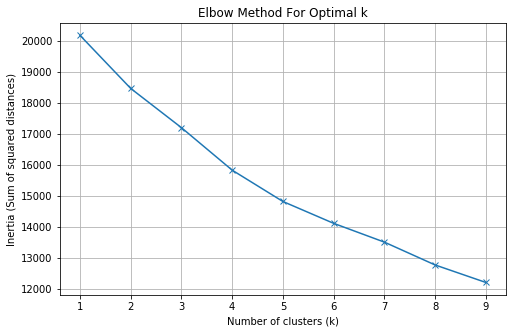

In [96]:
#Plot the sum of squared distances from the data points in the prepared bank dataset
#to the centers of the k-Means clusters for various values of k and use the Elbow method
#to pick the best value of k


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List of k values we want to try
k_values = range(1, 10)
inertia = []

# Calculating inertia for different k-values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_prepared)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='x')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


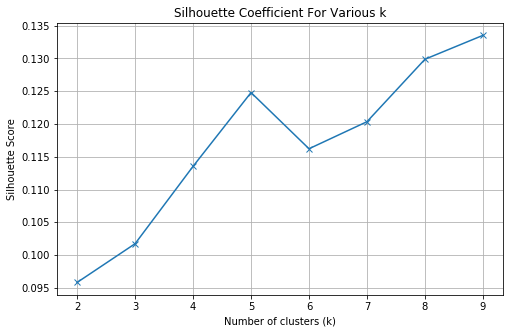

In [95]:
# Use the Silhouette Coefficient method to determine the best value of k as well.
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Compute the silhouette scores for different k values
for k in k_values[1:]:  # silhouette score cannot be computed for k = 1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_prepared)
    score = silhouette_score(X_train_prepared, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values[1:], silhouette_scores, marker='x')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient For Various k')
plt.grid(True)
plt.show()

The elbow seems to be around k=3 to k=4. K=4 has higher Silhouette score. 
So lets check for K=4


In [105]:
#Use the best value(s) of k to cluster the prepared bank dataset with k-means.
#Aim at producing meaningful clustering.

# Best k found from above analysis
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_prepared)

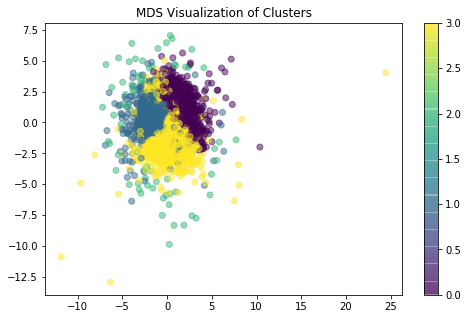

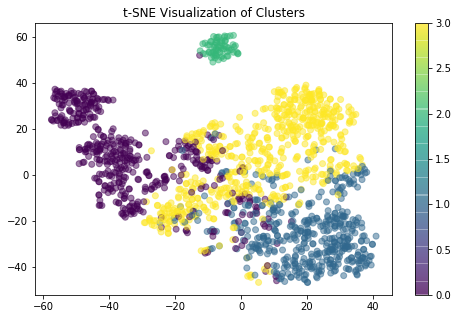

In [106]:
#Use MDS and t-SNE for visualising the clusterings.
from sklearn.manifold import MDS, TSNE

# MDS Visualization
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train_prepared)

plt.figure(figsize=(8, 5))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('MDS Visualization of Clusters')
plt.colorbar()
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_prepared)

plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('t-SNE Visualization of Clusters')
plt.colorbar()
plt.show()

# Task 3: DBSCAN
In your notebook e-tivity2.ipynb:

* Apply the DBSCAN clustering algorithm to the prepared bank dataset.
* Use MDS and t-SNE for visualising the clustering. Write a short conclusion about the characteristics of the clusters and compare the performance of DBSCAN to k-Means. (max 250 words in a markdown cell).
